Model Prediction: 
 [0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1] 

*********************************************

Accuracy:  0.89 

*********************************************

Report: 

               precision    recall  f1-score   support

NOT PURCHASED       0.89      0.96      0.92        68
    PURCHASED       0.89      0.75      0.81        32

  avg / total       0.89      0.89      0.89       100

[[65  3]
 [ 8 24]]


/home/priyom/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


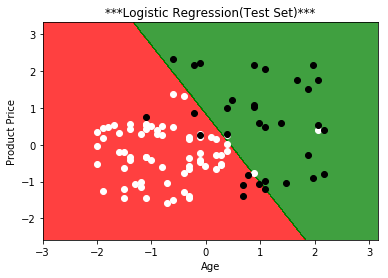

In [28]:
#IMPORTING THE REQUIRED LIBRARIES

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#IMPORTING THE DATASET

dataset=pd.read_csv('Social_Network_Ads.csv')

#IDENTIFYING SEPARATING THE DEPENDENT AND THE INDEPENDENT VARIABLE(COLOUMN)

x=dataset.iloc[:,2:4].values
y=dataset.iloc[:,4].values

#SEPARATING THE TRAINING AND THE TEST SET

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

#FEATURE SCALING
from sklearn.preprocessing import StandardScaler

sc_X=StandardScaler()

x_train=sc_X.fit_transform(x_train)
x_test=sc_X.transform(x_test)

#FITTING THE LOGISTIC REGRESSION ON THE TRAINING SET

from sklearn.linear_model import LogisticRegression

classifier=LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

#THE PREDICTED VALUE OF THE MODEL

print("Model Prediction: \n", classifier.predict(x_test),"\n")

print("*********************************************")

#THE ACCURACY OF THE MODEL

from sklearn.metrics import accuracy_score
print("\nAccuracy: ",accuracy_score(y_test,classifier.predict(x_test)),"\n")


print("*********************************************")
#THE CLASSIFICATION REPORT OF THE MODEL

print("\nReport: \n")
from sklearn.metrics import classification_report
print(classification_report(y_test,classifier.predict(x_test), target_names=['NOT PURCHASED','PURCHASED']))

#PREDICTED VALUES

y_pred=classifier.predict(x_test)

#CONFUSION MATRIX- GIVES US THE ACTUAL YES/NO AND THE PREDICTED YES/NO 

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))


#IMPORT THE LIBRARY

from matplotlib.colors import ListedColormap

x_set,y_set=x_test,y_test

#TO CREATE A GRID WITH ALL THE PIXEL POINTS RANGING FROM min()-max() of STEP RESOLUTION OF 0.01(to have a continuous grid)

x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))

#APPLY CLASSIFIER ON THE PIXEL POINTS IN THE FRAME AND COLORIZE. 'contourf' FUNCTION MAKES A CONTOUR BETWEEN THE CLASSIFIED REGIOINS AND THEN WE PREDICT THE CLASS OF EACH PIXELS.

plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),alpha=0.75,cmap=ListedColormap(('red','green')))

#PLOT LIMIT TO THE GRAPH

plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())

#RUN A LOOP TO PLOT ALL THE REAL VALUES AND CHECK WHERE IT LIES IN THE MODEL FRAME

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],c=ListedColormap(('white','black'))(i),label=j)

plt.title('***Logistic Regression(Test Set)***')
plt.xlabel('Age')
plt.ylabel('Product Price')
plt.show()
    